# 데이터 불러오기 + Resize 하기   

In [1]:
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras

from sklearn.model_selection import train_test_split

In [2]:
def resize_images(img_path):
    images = glob.glob(img_path + "/*.png")
    
    print(len(images), " images to be resized.")
    
    # 파일마다 모두 28X28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "png")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

750  images to be resized.
750  images resized.
가위 이미지 resize 완료!


In [3]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

750  images to be resized.
750  images resized.


In [4]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

750  images to be resized.
750  images resized.


In [5]:
def load_data(img_path, number_of_data=2250): # 가위 바위 보 이미지 개수 총합에 주의하세요.
    # 가위:0, 바위: 1, 보: 2
    img_size = 28
    color = 3
    # 이미지 데이터와 라벨(가위: 0, 바위: 1, 보: 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.png'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0 # 가위: 0
        idx = idx + 1
    
    for file in glob.iglob(img_path + '/rock/*.png'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1 # 바위: 1
        idx = idx + 1
    
    for file in glob.iglob(img_path + '/paper/*.png'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2 # 보: 2
        idx = idx + 1
    
    print("학습 데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

In [6]:
image_dir_path = "./rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))
# 최소값: 0  최대값: 255
# 입력은 0~1 사이의 값으로 정규화
x_train_norm = x_train / 255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습 데이터(x_train)의 이미지 개수는 2250 입니다.
최소값: 0  최대값: 255
x_train shape: (2250, 28, 28, 3)
y_train shape: (2250,)


라벨:  0


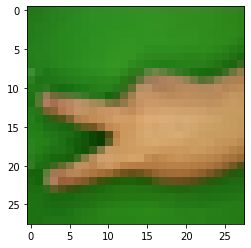

In [7]:
plt.imshow(x_train[2])
print('라벨: ', y_train[2])

## 딥러닝 네트워크 설계하기

In [8]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1 = 32
n_channel_2 = 64
n_channel_3 = 64
n_dense = 64
n_train_epoch = 10

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(n_channel_1, (3,3) ,input_shape=(28,28,3), activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

과적합을 막기위해 dropout에 0.5를 설정했습니다.  
활성화 함수로 ReLU를 사용하여 활성화값들의 균일한 분포를 위해 He 초깃값을 설정해 주었습니다.  

## 딥러닝 네트워크 학습시키기

In [9]:
print(x_train_norm.shape)
x_train_reshaped = x_train_norm.reshape( -1, 28, 28, 3)
print(x_train_reshaped.shape)

(2250, 28, 28, 3)
(2250, 28, 28, 3)


In [10]:
x_train_1, x_valid_1, y_train_1, y_valid_1 = train_test_split(x_train_reshaped, y_train, random_state=2023, test_size=.2)

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_1, y_train_1, validation_data=(x_valid_1, y_valid_1), epochs=10)

Epoch 1/10
57/57 [==============================] - 2s 17ms/step - loss: 1.1866 - accuracy: 0.4250 - val_loss: 1.0177 - val_accuracy: 0.6178
Epoch 2/10
57/57 [==============================] - 1s 11ms/step - loss: 0.8715 - accuracy: 0.6322 - val_loss: 0.7005 - val_accuracy: 0.8156
Epoch 3/10
57/57 [==============================] - 1s 11ms/step - loss: 0.5773 - accuracy: 0.7833 - val_loss: 0.3724 - val_accuracy: 0.8978
Epoch 4/10
57/57 [==============================] - 1s 12ms/step - loss: 0.3568 - accuracy: 0.8700 - val_loss: 0.2411 - val_accuracy: 0.9267
Epoch 5/10
57/57 [==============================] - 1s 12ms/step - loss: 0.2589 - accuracy: 0.9044 - val_loss: 0.1848 - val_accuracy: 0.9489
Epoch 6/10
57/57 [==============================] - 1s 11ms/step - loss: 0.1854 - accuracy: 0.9339 - val_loss: 0.1300 - val_accuracy: 0.9667
Epoch 7/10
57/57 [==============================] - 1s 13ms/step - loss: 0.1595 - accuracy: 0.9439 - val_loss: 0.1053 - val_accuracy: 0.9778
Epoch 8/10
57

## 시각화

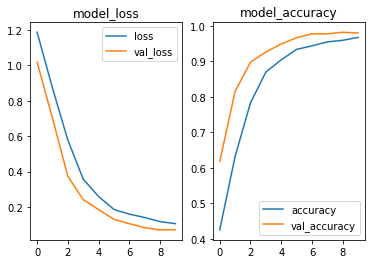

In [12]:
plt.subplot(121)
plt.title('model_loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.subplot(122)
plt.title('model_accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

### 테스트 데이터로 성능 확인

In [13]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path = "./rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = "./rock_scissor_paper/test/paper"
resize_images(image_dir_path)

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "./rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
# 입력은 0~1 사이의 값으로 정규화
print('최소값:',np.min(x_test), ' 최대값:',np.max(x_test))
x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

print("-"*40)

print(x_test_norm.shape)

x_test_reshaped = x_test_norm.reshape( -1, 28, 28, 3)

print(x_test_reshaped.shape)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_test)의 이미지 개수는 300 입니다.
최소값: 0  최대값: 255
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
----------------------------------------
(300, 28, 28, 3)
(300, 28, 28, 3)


In [14]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.4330 - accuracy: 0.8467
test_loss: 0.43297359347343445
test_accuracy: 0.846666693687439


# 회고

학습의 정확도나 오버피팅을 방지하기 위해 다양한 데이터를 추가했고,  
이미지 인식을 수월하게 하기위해 배경을 인식시켜야할 이미지와 대비되는 색으로 선택하였더니 정확도가 눈에띄게 상승했습니다. 
모델의 개선을 위해 이미지 전처리, 정규화, 하이퍼파라미터 조정, 활성함수에 맞는 가중치 초깃값 설정,  
검증데이터와 테스트 데이터로 모델 성능 확인 등 다양한 방법들을 시도해 볼 수 있었던 시간이었습니다.